#Machine Learning Assignment – Multiple Linear Regression

#Objective:

 Implement a Multiple Linear Regression model to predict house prices based on square
footage, number of bedrooms, and age of the house.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


#Dataset: A dataset with features such as square footage, number of bedrooms, house age, and the target variable being house prices.

#1. Load the Data:

In [25]:
# Load the data
data = pd.read_csv(r'C:\Users\Tahir\Downloads/house_prices_data.csv')

#2. Explore the Data:

In [27]:
# Explore the data
print(data.head())

   Square_Footage  Num_Bedrooms  House_Age    House_Price
0            3674             1         61  608468.940708
1            1360             5         57  335254.995658
2            1794             5         51  402370.090653
3            1630             2         11  311854.298045
4            1595             5         38  379356.590435


In [29]:
print(data.isnull().sum())

Square_Footage    0
Num_Bedrooms      0
House_Age         0
House_Price       0
dtype: int64


In [ ]:
There is no missing value in the dataset.

In [31]:
# Display basic statistics of the dataset
print(data.describe())

       Square_Footage  Num_Bedrooms   House_Age    House_Price
count      100.000000    100.000000  100.000000     100.000000
mean      2368.700000      2.970000   47.780000  449659.080684
std       1018.723617      1.480206   31.132684  154305.631374
min        521.000000      1.000000    0.000000  133560.988172
25%       1566.750000      1.000000   19.000000  313684.825488
50%       2468.000000      3.000000   50.000000  450938.501852
75%       3288.750000      4.000000   72.500000  568634.253802
max       3999.000000      5.000000   98.000000  756310.952144


Statistics show that there is need to normalize the data.

#Normalize The Data

In [33]:
# Normalize the data
scaler = StandardScaler()
data[['Square_Footage', 'Num_Bedrooms', 'House_Age']] = scaler.fit_transform(data[['Square_Footage', 'Num_Bedrooms', 'House_Age']])


3. Visualize the data through Charts

#3.1 Pairplot:

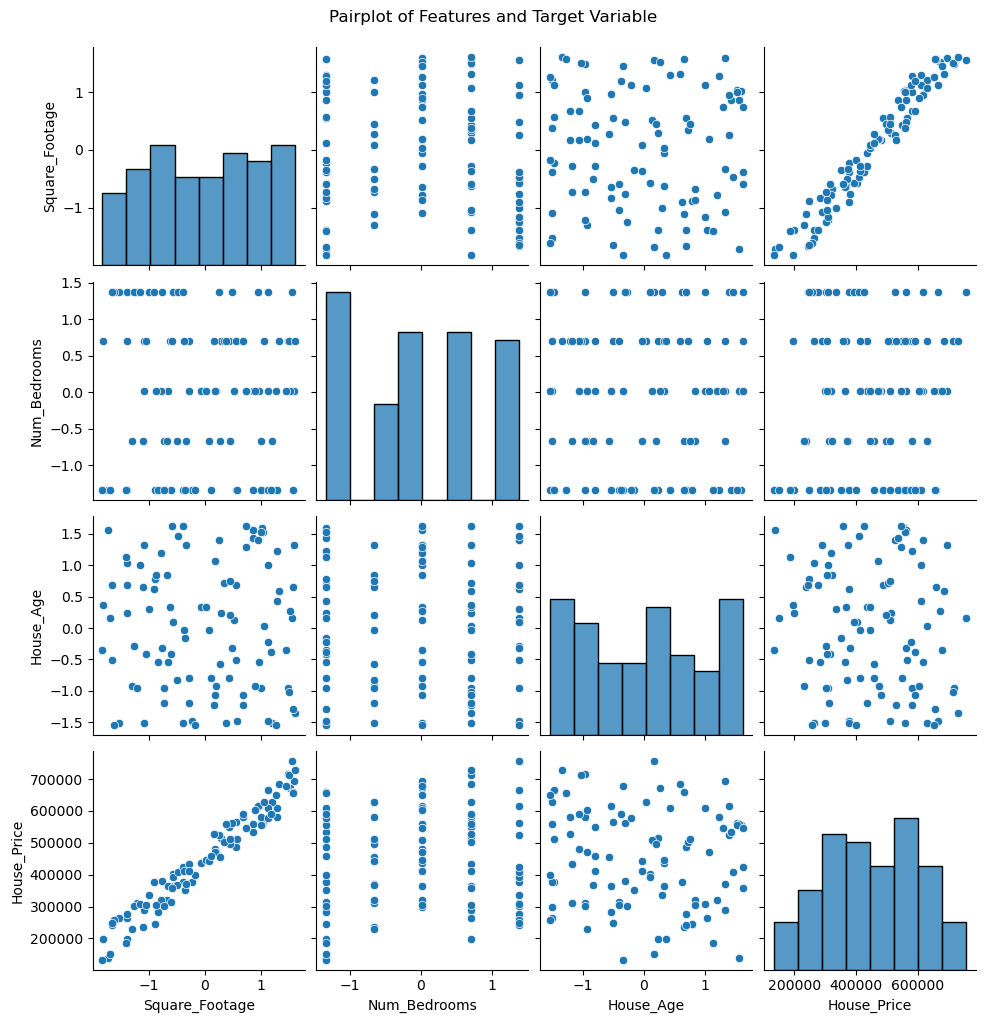

In [47]:
# Plotting pairplot to see the relationships between variables
sns.pairplot(data)
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.show()



#3.2 Distribution Plot:

In [ ]:
House_Price, the target variable has linear relationship with square_Footage. It means that if square_Footage value increased than the 
price of house is also increased. 

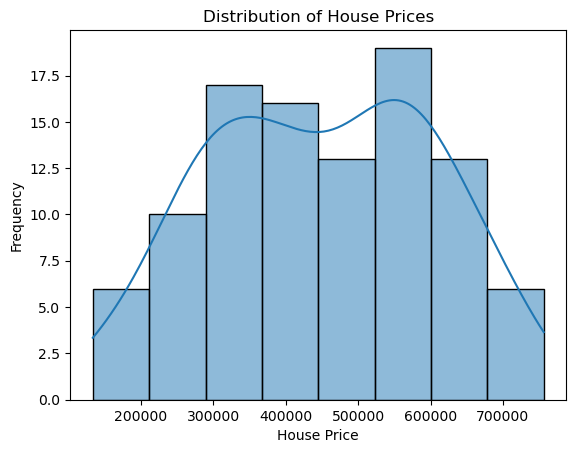

In [49]:
# Plotting the distribution of house prices
sns.histplot(data['House_Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()



#3.3 Scatter Plot (Square Footage vs House Price):

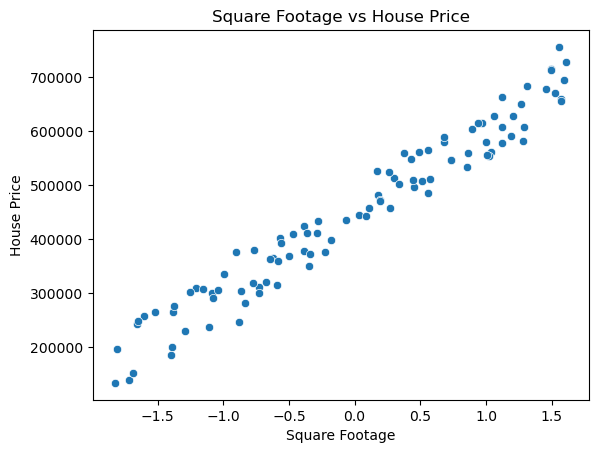

In [51]:
# Plotting the relationship between Square Footage and House Price
sns.scatterplot(x='Square_Footage', y='House_Price', data=data)
plt.title('Square Footage vs House Price')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()



#3.4 Box Plot (Number of Bedrooms vs House Price):

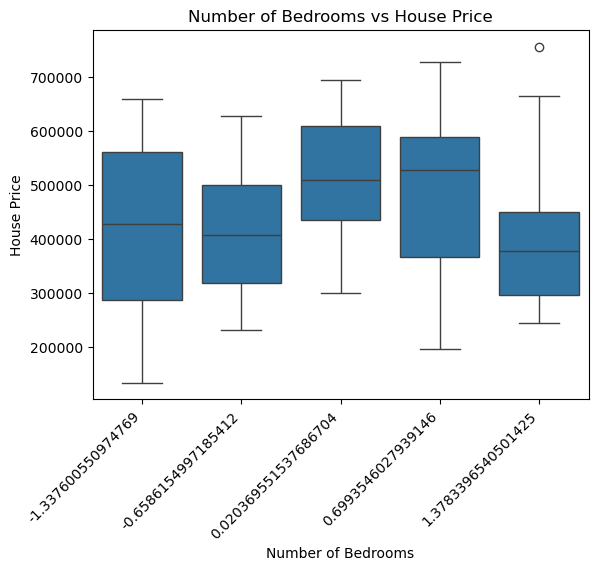

In [53]:
# Plotting the relationship between Number of Bedrooms and House Price
sns.boxplot(x='Num_Bedrooms', y='House_Price', data=data)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.title('Number of Bedrooms vs House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.show()


#3.5 Scatter Plot (House Age vs House Price):

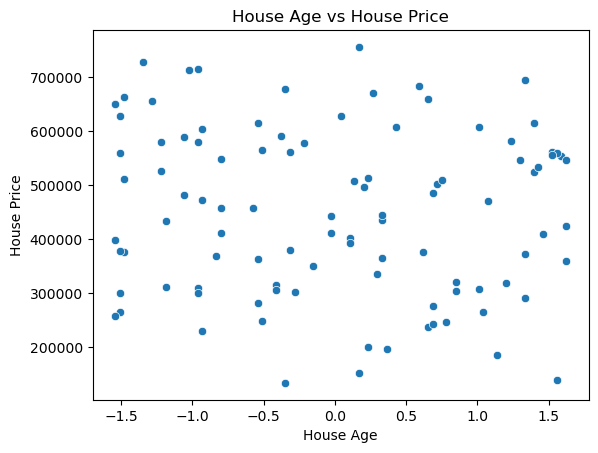

In [55]:
# Plotting the relationship between House Age and House Price
sns.scatterplot(x='House_Age', y='House_Price', data=data)
plt.title('House Age vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()



#3.6 Correlation Heatmap:

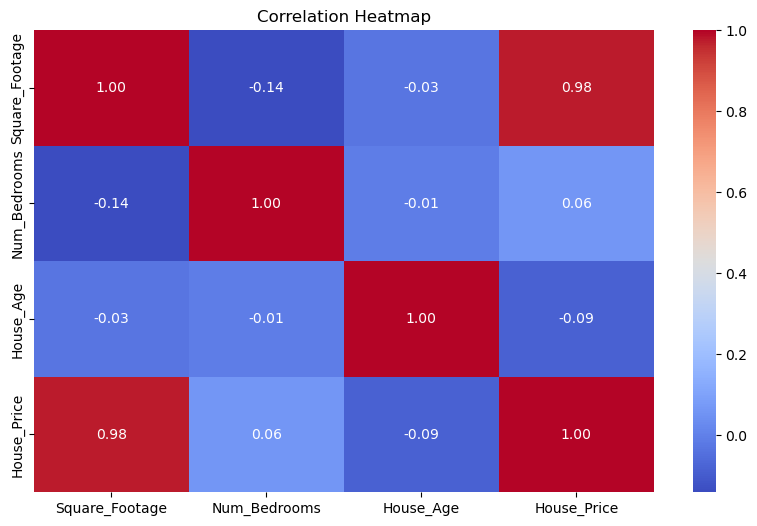

In [57]:
# Heatmap to show correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


correlation heatmap shows that House_Price and Square_Footage has strong correlation of 0.98. Other correlation can be ignored.

#4. Split the Data and Train the model

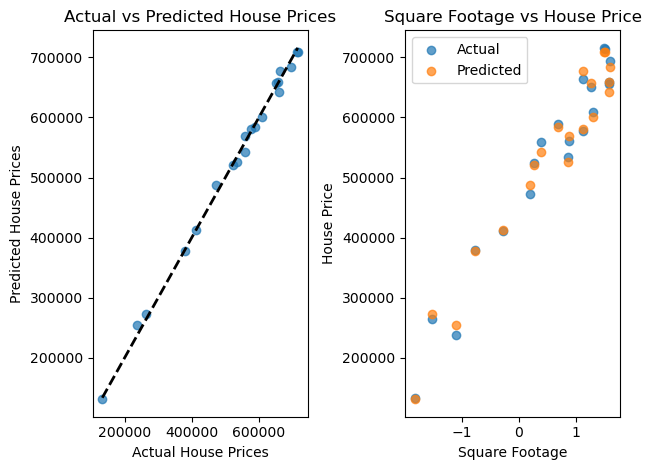

In [59]:
# Split the data
X = data[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y = data['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Visualize the results
# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')

# Additional plots for X_test features
plt.subplot(1, 2, 2)
plt.scatter(X_test['Square_Footage'], y_test, label='Actual', alpha=0.7)
plt.scatter(X_test['Square_Footage'], y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('Square Footage vs House Price')
plt.legend()

plt.tight_layout()
plt.show()



In [65]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')



Mean Squared Error (MSE): 91726130.73039225
Root Mean Squared Error (RMSE): 9577.375983555843
Mean Absolute Error (MAE): 8030.95560405432
R-squared: 0.9965233213503353


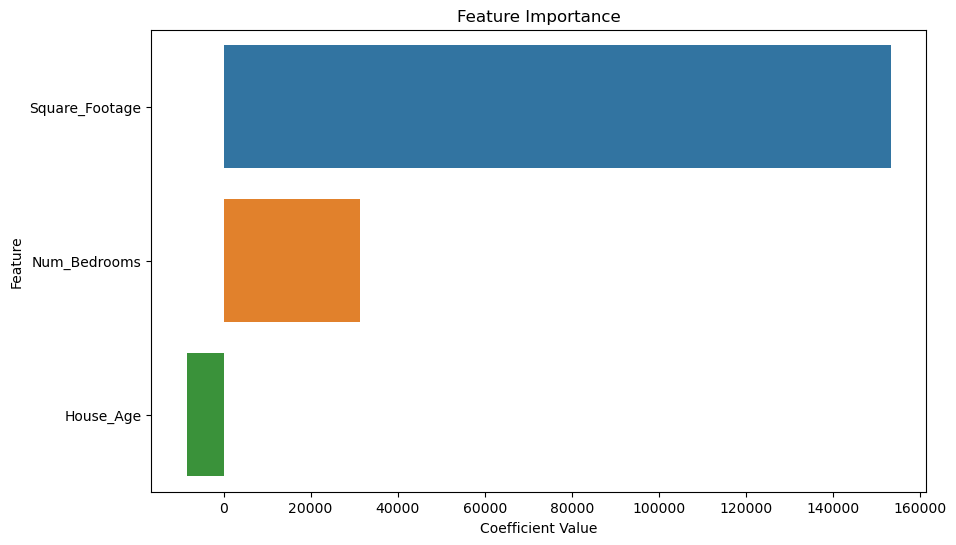

In [53]:
# Feature importance
importance = model.coef_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})




In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


#8. Create a Prediction Function:

In [69]:
# Function to predict house prices
def predict_house_price(square_footage, num_bedrooms, house_age):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    input_features_scaled = scaler.transform(input_features)
    predicted_price = model.predict(input_features_scaled)
    return predicted_price[0]

# Example usage of the prediction function
square_footage = 3500
num_bedrooms = 4
house_age = 25

predicted_price = predict_house_price(square_footage, num_bedrooms, house_age)

print(f'Predicted House Price for {square_footage} sq ft, {num_bedrooms} bedrooms, {house_age} years old: ${predicted_price}')


Predicted House Price for 3500 sq ft, 4 bedrooms, 25 years old: $648904.8587096122
